In [1]:
import cv2
import pytesseract
import os
import numpy as np
import Levenshtein
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dictionary
bigorderlabel = ['5951C001AA', '5951C004AA', '5951C005AA', '5951C008AA', '5951C009AA', '5951C010AA', '5951C013AA', '5951C015AA', '5951C019AA']
label = ['imageCLASSXMF1440', 'SateraMF467dw', 'imageCLASSMF465dw', 'I-SENSYSMF463dw—', 'imageCLASSMF469x', 'imageCLASSMF465dw', 'imageCLASSMF463dw', 'imageCLASSMF462dw', 'imageCLASSMF461dw']#8번 용량이 매우 큼.
my_dict = {key: value for key, value in zip(bigorderlabel, label)}

In [3]:
class Image_To_Text:
    def __init__(self, HEIGHT_down, HEIGHT_up, WIDTH_left, WIDTH_right):
        self.HEIGHT_down, self.HEIGHT_up, self.WIDTH_left, self.WIDTH_right = HEIGHT_down, HEIGHT_up, WIDTH_left, WIDTH_right

    def calculate_similarity(self, image_path, label):
        self.image_path = image_path
        self.label = label
        self.image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
        self.image = np.array(self.image)
        self.cropped_image = self.image[self.HEIGHT_down:self.HEIGHT_up, self.WIDTH_left:self.WIDTH_right, :]
        self.text = pytesseract.image_to_string(self.cropped_image)
        
        # Remove newline characters, spaces, and ASCII code 12 characters
        self.text = self.text.replace('\n', '').replace(' ', '').replace('\x0C', '')
        self.text = self.text.replace('MF', '')
        self.label = self.label.replace('MF', '')
        if "imageCLASS" in self.text:
            self.text = self.text.replace('imageCLASS', '')
            self.label = self.label.replace('imageCLASS', '')
        # Calculate distance
        distance = Levenshtein.distance(self.text, self.label)
        
        
        # 문자열 길이 중에서 더 긴 쪽을 기준으로 유사도 계산
        max_length = max(len(self.text), len(self.label))
        similarity = 1 - (distance / max_length)

        return similarity


In [4]:
bigorderlabel_data = '5951C008AA'
path = os.path.join('../cleandata/(0)', bigorderlabel_data, '(1)/pass')
image_list = os.listdir(path)
HEIGHT_down, HEIGHT_up, WIDTH_left, WIDTH_right = 400, 800, 60, 1100 # 0:800, 0:1280
project = Image_To_Text(HEIGHT_down, HEIGHT_up, WIDTH_left, WIDTH_right)
n=0
results_df = pd.DataFrame()
image_save=[]
for image in image_list:
    image_path = os.path.join(path, image)
    label_data = my_dict.get(bigorderlabel_data)
    similarity = project.calculate_similarity(image_path, label_data)
    label = project.text
    data = {
    'Label' : [label],
    'similarity' : [similarity],
    }
    indexName = [n]
    df = pd.DataFrame(data, index = indexName)
    results_df = pd.concat([results_df, df])
    n=n+1
    image_save.append(project.cropped_image)

In [5]:
print(results_df)

                Label  similarity
0      I-SENSYS463dw—    1.000000
1      I-SENSYS463dw—    1.000000
2      I-SENSYS463dw—    1.000000
3      I-SENSYS463dw—    1.000000
4      I-SENSYS463dw—    1.000000
...               ...         ...
4638  I-SENSYS463dwee    0.866667
4639   I-SENSYS463dw—    1.000000
4640   I-SENSYS463dw—    1.000000
4641  I-SENSYS463dw——    0.933333
4642  I-SENSYS463dw—"    0.933333

[4643 rows x 2 columns]


In [6]:
indices_not = results_df[results_df['Label'] != project.label].index
count_not = len(indices_not)
print(count_not)

818


In [7]:
indices_sim = results_df[results_df['similarity'] != 1.0].index
count_sim = len(indices_sim)
print(indices_sim)

Int64Index([   5,   12,   29,   31,   32,   37,   46,   50,   53,   56,
            ...
            4595, 4625, 4627, 4628, 4631, 4632, 4636, 4638, 4641, 4642],
           dtype='int64', length=818)


In [8]:
min_similarity = results_df['similarity'].min()
min_row_index = results_df['similarity'].idxmin()
print("Minimum similarity:", min_similarity)
print("Row index with minimum similarity:", min_row_index)


Minimum similarity: 0.3571428571428571
Row index with minimum similarity: 120


I-SENSYS463dw—"
463dw


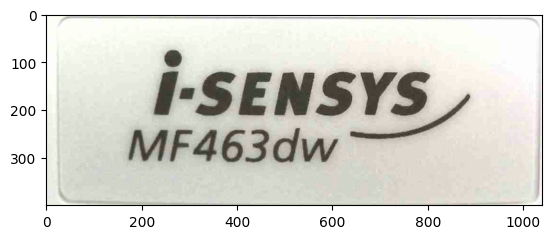

In [9]:

plt.imshow(image_save[min_row_index])
print(project.text)
print(results_df['Label'][min_row_index])

In [10]:
results_df.iloc[115:125]

,Label,similarity
115,I-SENSYS463dw—,1.000000
116,I-SENSYS463dw—,1.000000
117,I-SENSYS463dw—,1.000000
118,I-SENSYS463dw—,1.000000
119,I-SENSYS463dw—,1.000000
120,463dw,0.357143
121,I-SENSYS463dw—,1.000000
122,I-SENSYS463dw—,1.000000
123,I-SENSYS463dw—,1.000000
124,I-SENSYS463dw—,1.000000


In [11]:
max_similarity = results_df['similarity'].max()
max_row_index = results_df['similarity'].idxmax()
print("Maximum similarity:", max_similarity)
print("Row index with maximum similarity:", max_row_index)

Maximum similarity: 1.0
Row index with maximum similarity: 0
